<a href="https://colab.research.google.com/github/anubhavsingh10/Named-Entity-Recognition/blob/main/NamedEntityRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/NamedEntityRecognition/ner_dataset.csv",encoding = 'latin1')
data = data.fillna(method='ffill')

In [ ]:
data.head(10)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [ ]:
print ('UniqueWords:',data['Word'].nunique())
print ('UniqueTags:',data['Tag'].nunique())

UniqueWords: 35178
UniqueTags: 17


In [ ]:
words = list(set(data["Word"].values))
words.append("ENDLIST")
num_words = len(words)
print (num_words)

35179


In [ ]:
tags = list(set(data["Tag"].values))
num_tags = len(tags)

In [ ]:
words[0]

'dedication'

# **Calling Sentences and Tags**

In [ ]:
class Callingsentence(object):
    def __init__(self, data):
        self.num_sent = 1
        self.data = data
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [ ]:
call = Callingsentence(data)
sentences = call.sentences

In [ ]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

# *MAPPING*

In [ ]:
word2index = {w: i + 1 for i, w in enumerate(words)}
tag2index = {t: i for i, t in enumerate(tags)}

In [ ]:
print(word2index)
print(tag2index)

{'dedication': 1, 'understates': 2, 'slums': 3, 'notification': 4, 'otherwise': 5, 'extremely': 6, 'sixth': 7, 'soaked': 8, 'toil': 9, 'Nationwide': 10, 'launch': 11, 'shuttle': 12, 'Mohmmed': 13, 'guidance': 14, 'Qutbi': 15, '6,000': 16, 'Shane': 17, 'needless': 18, 'catalysts': 19, 'comeback': 20, 'worst-hit': 21, 'lip': 22, 'lawsuit': 23, 'urge': 24, '36': 25, 'take-over': 26, 'low-level': 27, 'rises': 28, 'Kempthorne': 29, 'swallow': 30, 'affordable': 31, 'Mehmood': 32, 'arrives': 33, 'Kanow': 34, 'Jemaah': 35, 'Croatians': 36, 'pleases': 37, 'MACAPAGAL-ARROYO': 38, 'ExoMars': 39, 'shatters': 40, 'Oresund': 41, 'smoked': 42, 'longer': 43, 'Tidjane': 44, "Shi'ite-led": 45, 'Dramane': 46, 'addition': 47, 'designating': 48, 'Vital': 49, 'Earthquake': 50, 'self-declared': 51, 'Bounty': 52, 'Others': 53, 'Lagunas': 54, 'al-Anbar': 55, 'Shihab': 56, 'Israeli-': 57, 'Rakhine': 58, 'mid-April': 59, 'Ruecker': 60, 'Aliu': 61, 'assortment': 62, 'flourishing': 63, 'Turkmens': 64, 'procedure':

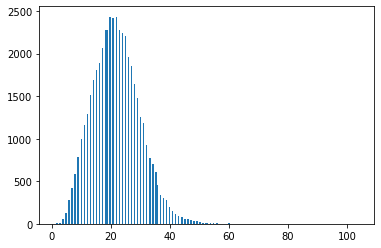

In [ ]:
plt.hist([len(s) for s in sentences], bins=200)
plt.show()

# **Padding and Training**

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = [[word2index[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

Y = [[tag2index[w[2]] for w in s] for s in sentences]
Y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2index["O"])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
print (len(x_train))
print(len(x_test))

38367
9592


# Developing the LSTM Model

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [ ]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=50, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 50, 50)            1758950   
_________________________________________________________________
spatial_dropout1d_8 (Spatial (None, 50, 50)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 200)           120800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history =model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    batch_size=64, 
    epochs=3,
    verbose=1
)

Epoch 1/3
600/600 [==============================] - 147s 244ms/step - loss: 0.2577 - accuracy: 0.9458 - val_loss: 0.1048 - val_accuracy: 0.9711
Epoch 2/3
600/600 [==============================] - 146s 244ms/step - loss: 0.0689 - accuracy: 0.9806 - val_loss: 0.0565 - val_accuracy: 0.9834
Epoch 3/3
600/600 [==============================] - 146s 244ms/step - loss: 0.0445 - accuracy: 0.9869 - val_loss: 0.0510 - val_accuracy: 0.9848


In [ ]:
model.evaluate(x_test, y_test)

300/300 [==============================] - 8s 25ms/step - loss: 0.0510 - accuracy: 0.9848


[0.05100139230489731, 0.9847790002822876]